<a href="https://colab.research.google.com/github/nminhquang380/AIFundamentals/blob/main/aus_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [26]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics,cross_validation

import joblib

In [27]:
np.random.seed(42)

## Load Stock History Data

In [28]:
END = pd.to_datetime('2023-09-11')
years = 5 # Number of years of data
START = END - timedelta(days=365*years + years//4)
print(END, START)

2023-09-11 00:00:00 2018-09-11 00:00:00


In [29]:
ticker_data = pd.DataFrame(columns=['Code', 'Company_name'])
ticker_data

Empty DataFrame
Columns: [Code, Company_name]
Index: []

In [30]:
tickers = []
# I got this list in this link https://www.asx20list.com/
ticker_list = """ANZ	Australia and New Zealand Banking Group Ltd
BHP	BHP Group Ltd
CBA	Commonwealth Bank of Australia
CSL	CSL Ltd
FMG	Fortescue Metals Group Ltd
GMG	Goodman Group
MQG	Macquarie Group Ltd
NAB	National Australia Bank Ltd
NCM	Newcrest Mining Ltd
REA	REA Group Ltd
RIO	RIO Tinto Ltd
TLS	Telstra Corporation Ltd
WBC	Westpac Banking Corporation
WES	Wesfarmers Ltd
WOW	Woolworths Group Ltd
XRO	Xero Ltd"""
i = 0
for line in ticker_list.split('\n'):
    code = line.split('\t')[0]
    name = line.split('\t')[1]
    identity = i
    i += 1

    tickers.append(code)
    df_temp = pd.DataFrame({
        'Code': [code],
        'Company_name': [name],
    })
    ticker_data = pd.concat([ticker_data, df_temp], ignore_index=True)

tickers

['ANZ',
 'BHP',
 'CBA',
 'CSL',
 'FMG',
 'GMG',
 'MQG',
 'NAB',
 'NCM',
 'REA',
 'RIO',
 'TLS',
 'WBC',
 'WES',
 'WOW',
 'XRO']

In [31]:
ticker_data

Code                                 Company_name
0   ANZ  Australia and New Zealand Banking Group Ltd
1   BHP                                BHP Group Ltd
2   CBA               Commonwealth Bank of Australia
3   CSL                                      CSL Ltd
4   FMG                   Fortescue Metals Group Ltd
5   GMG                                Goodman Group
6   MQG                          Macquarie Group Ltd
7   NAB                  National Australia Bank Ltd
8   NCM                          Newcrest Mining Ltd
9   REA                                REA Group Ltd
10  RIO                                RIO Tinto Ltd
11  TLS                      Telstra Corporation Ltd
12  WBC                  Westpac Banking Corporation
13  WES                               Wesfarmers Ltd
14  WOW                         Woolworths Group Ltd
15  XRO                                     Xero Ltd

In [32]:
df_temp = yf.download('ANZ.AX', START, END)
df_temp['Ticker'] = 'ANZ.AX'
df_temp.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [33]:
df_temp

Date       Open       High        Low      Close  Adj Close  \
0    2018-09-11  28.340000  28.670000  28.330000  28.580000  21.998739   
1    2018-09-12  28.480000  28.590000  28.309999  28.370001  21.837101   
2    2018-09-13  28.209999  28.290001  28.030001  28.059999  21.598484   
3    2018-09-14  28.090000  28.280001  28.090000  28.150000  21.667761   
4    2018-09-17  28.100000  28.430000  28.049999  28.400000  21.860189   
...         ...        ...        ...        ...        ...        ...   
1260 2023-09-04  25.260000  25.309999  25.080000  25.190001  25.190001   
1261 2023-09-05  25.170000  25.230000  25.059999  25.200001  25.200001   
1262 2023-09-06  25.280001  25.379999  24.955000  25.059999  25.059999   
1263 2023-09-07  24.980000  25.000000  24.645000  24.870001  24.870001   
1264 2023-09-08  24.930000  25.040001  24.760000  24.930000  24.930000   

       Volume  Ticker  
0     3273782  ANZ.AX  
1     2872094  ANZ.AX  
2     3593758  ANZ.AX  
3     3996645  ANZ.AX  
4     3426323  ANZ.AX  
...       ...     ...  
1260  3909845  ANZ.AX  
1261  3116039  ANZ.AX  
1262  4120990  ANZ.AX  
1263  5294875  ANZ.AX  
1264  3217890  ANZ.AX  

[1265 rows x 8 columns]

In [34]:
data = pd.DataFrame()
for ticker in tickers:
  df_temp = yf.download(ticker+'.AX', START, END)
  df_temp['Ticker'] = ticker
  df_temp = df_temp.reset_index()
  data = pd.concat([data, df_temp])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [35]:
data.to_csv('initial_data.csv',index=False)

## Explore Dataset

In [36]:
data.head()

Date       Open       High        Low      Close  Adj Close   Volume  \
0 2018-09-11  28.340000  28.670000  28.330000  28.580000  21.998743  3273782   
1 2018-09-12  28.480000  28.590000  28.309999  28.370001  21.837099  2872094   
2 2018-09-13  28.209999  28.290001  28.030001  28.059999  21.598484  3593758   
3 2018-09-14  28.090000  28.280001  28.090000  28.150000  21.667759  3996645   
4 2018-09-17  28.100000  28.430000  28.049999  28.400000  21.860191  3426323   

  Ticker  
0    ANZ  
1    ANZ  
2    ANZ  
3    ANZ  
4    ANZ

In [37]:
data[data['Ticker'] == 'CBA']

Date        Open        High         Low       Close   Adj Close  \
0    2018-09-11   71.139999   72.129997   71.059998   71.870003   58.034756   
1    2018-09-12   72.000000   72.209999   71.629997   71.930000   58.083206   
2    2018-09-13   71.480003   71.809998   71.059998   71.180000   57.477592   
3    2018-09-14   71.309998   71.639999   71.180000   71.500000   57.735981   
4    2018-09-17   71.500000   72.000000   71.105003   71.750000   57.937862   
...         ...         ...         ...         ...         ...         ...   
1260 2023-09-04  101.690002  102.269997  101.570000  102.010002  102.010002   
1261 2023-09-05  102.099998  102.290001  101.750000  102.220001  102.220001   
1262 2023-09-06  102.750000  103.180000  101.294998  101.510002  101.510002   
1263 2023-09-07  101.000000  101.379997  100.309998  100.900002  100.900002   
1264 2023-09-08  101.230003  101.470001  100.150002  100.809998  100.809998   

       Volume Ticker  
0     3061454    CBA  
1     4798543    CBA  
2     2708851    CBA  
3     2823428    CBA  
4     1690695    CBA  
...       ...    ...  
1260  1425483    CBA  
1261  1274211    CBA  
1262  2000414    CBA  
1263  1721897    CBA  
1264  1271405    CBA  

[1265 rows x 8 columns]

In [38]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Ticker'],
      dtype='object')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20239 entries, 0 to 1264
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       20239 non-null  datetime64[ns]
 1   Open       20239 non-null  float64       
 2   High       20239 non-null  float64       
 3   Low        20239 non-null  float64       
 4   Close      20239 non-null  float64       
 5   Adj Close  20239 non-null  float64       
 6   Volume     20239 non-null  int64         
 7   Ticker     20239 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.4+ MB


In [40]:
data.describe()

Open          High           Low         Close     Adj Close  \
count  20239.000000  20239.000000  20239.000000  20239.000000  20239.000000   
mean      67.787159     68.431590     67.118294     67.780230     63.283468   
std       68.922837     69.541161     68.232063     68.886951     67.064012   
min        2.700000      2.710000      2.660000      2.680000      1.891261   
25%       23.400000     23.620001     23.172500     23.379999     20.951982   
50%       37.310001     37.689999     37.029999     37.369999     33.025673   
75%       98.879997     99.660000     97.945000     98.790001     91.555004   
max      339.420013    342.750000    337.029999    341.000000    326.106628   

             Volume  
count  2.023900e+04  
mean   5.353087e+06  
std    7.690310e+06  
min    0.000000e+00  
25%    1.106904e+06  
50%    2.921595e+06  
75%    6.316792e+06  
max    3.274170e+08

In [41]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64

In [42]:
data.duplicated().sum()

0

## Visualize Data

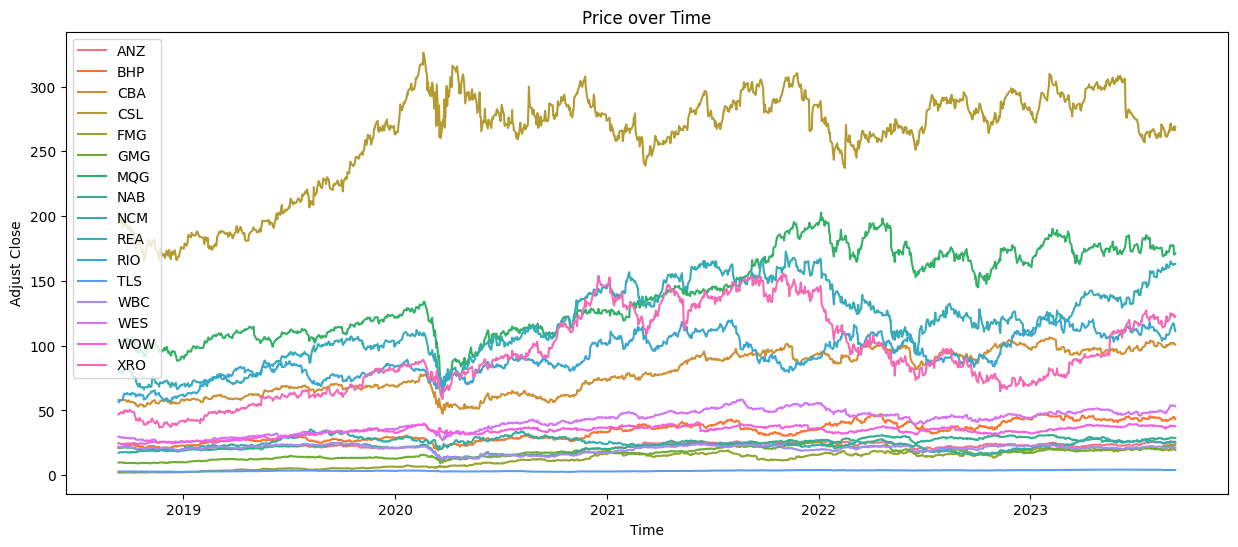

In [43]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date', y='Adj Close', hue='Ticker', data=data)
plt.xlabel('Time')
plt.ylabel('Adjust Close')
plt.title('Price over Time')
plt.legend()
plt.show()

Regards to this figure, we can see that the price of each stock is increase gradually from the beginning of the data to first quarter of 2020. .In the first quarter of 2020, there was a significal drop of all stock, then most of them flactuates in the following time to now, but the overall trend is slightly up.

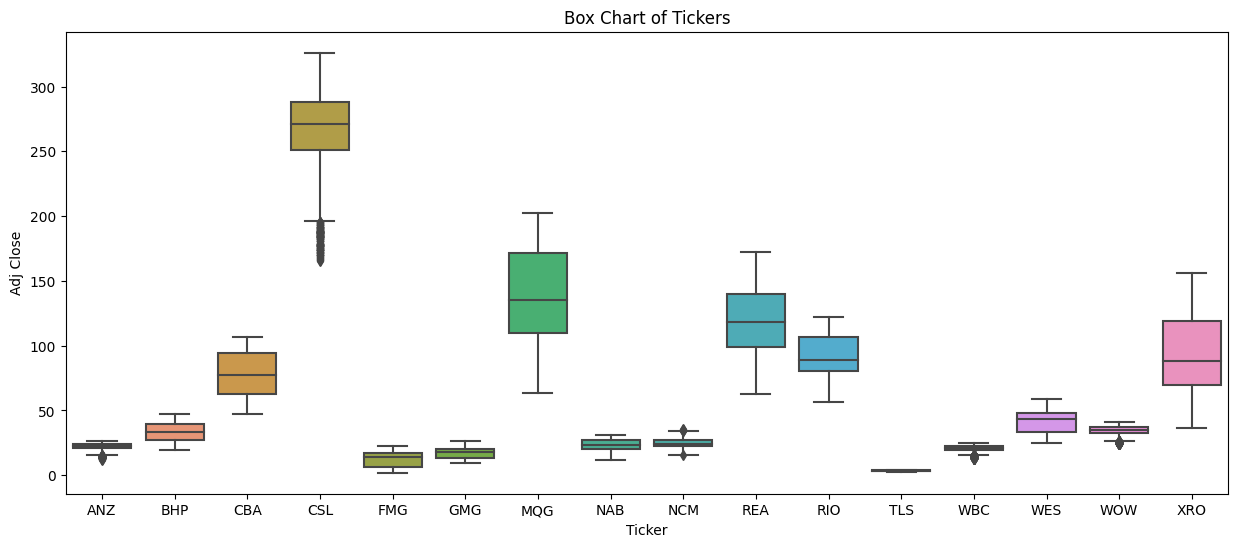

In [44]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Ticker', y='Adj Close', data=data)
plt.xlabel('Ticker')
plt.ylabel('Adj Close')
plt.title('Box Chart of Tickers')
plt.show()

There are 3 different groups. The CSL is outlier of our list, the secound group includes CBA, MQG, REA, RIO, XRO, and then the others. So we divive them to 3 groups.

In [45]:
data1 = data[data['Ticker'] == 'CSL']
data2 = data[data['Ticker'].isin(['CBA', 'MQG', 'REA', 'RIO', 'XRO'])]
data3 = data[data['Ticker'].isin(['ANZ', 'BHP', 'FMG', 'GMG', 'NAB', 'NCM', 'TLS', 'WBC', 'WES', 'WOW'])]


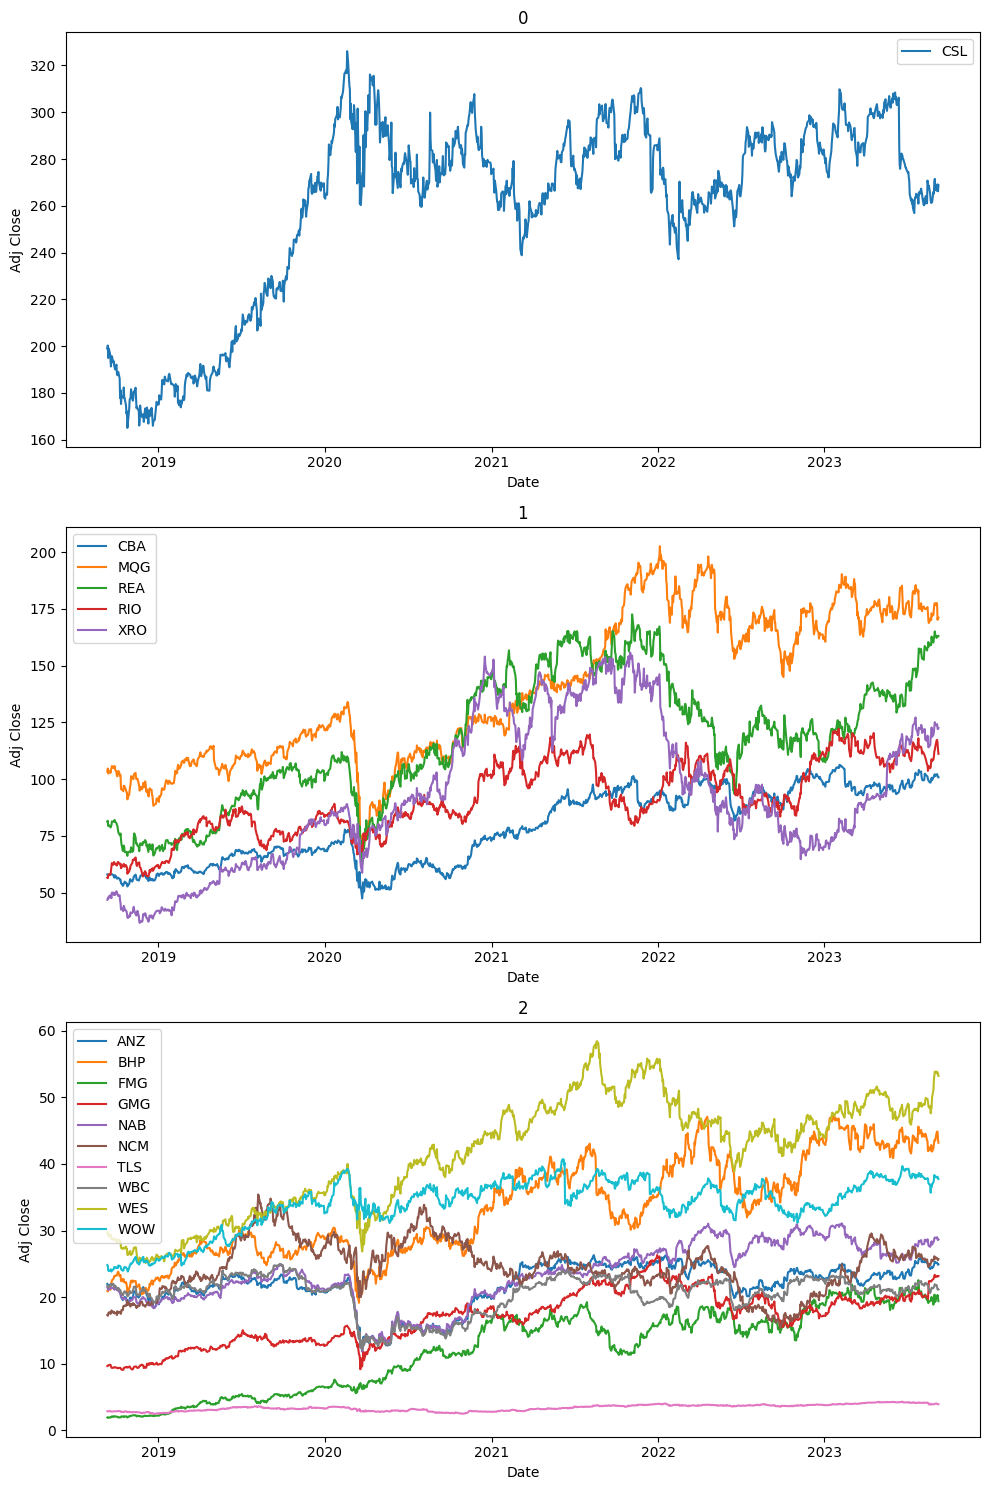

In [46]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, df in enumerate([data1, data2, data3]):
  sns.lineplot(data=df, x='Date', y='Adj Close', hue='Ticker',ax=axes[i])
  axes[i].set_title(i)
  axes[i].set_xlabel('Date')
  axes[i].set_ylabel('Adj Close')
  axes[i].legend()
plt.tight_layout()
plt.show()

Now we visualize for each group

<ipython-input-47-eb6a4c0e5a0f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


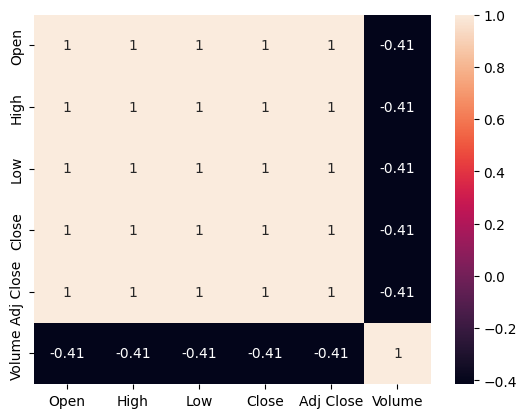

In [47]:
plt.figure()
sns.heatmap(data.corr(),annot=True)
plt.show()

## Time Series Analyze

### Trends

In [48]:
df = data[data['Ticker'] == 'CBA']

<ipython-input-49-bee28f2d0e56>:5: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date', 'Ticker'], dtype='object')
  ).mean()


<Axes: >

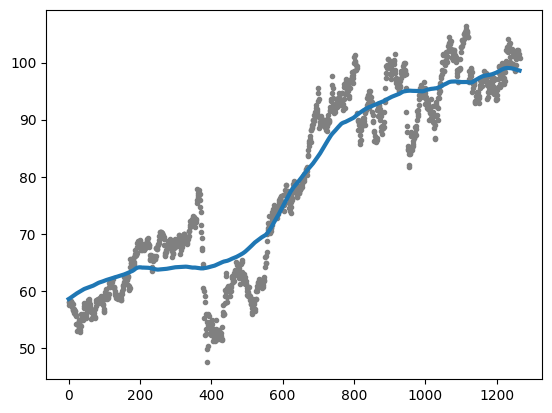

In [49]:
moving_average = df.rolling(
    window=365,
    center=True,
    min_periods=183
).mean()
ax = df['Adj Close'].plot(style='.', color='0.5')
moving_average['Adj Close'].plot(ax=ax, linewidth=3)

As we can see, the overall trend of CBA is increasing.
### Seasonalities

In [50]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        errorbar=('ci', False),
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


<ipython-input-51-04499b1eb27d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day"] = df.Date.dt.dayofweek  # the x-axis (freq)
<ipython-input-51-04499b1eb27d>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = df.Date.dt.week  # the seasonal period (period)
<ipython-input-51-04499b1eb27d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["week"] = df.Date.dt.week  # the seasonal period (period)
<ipython-in

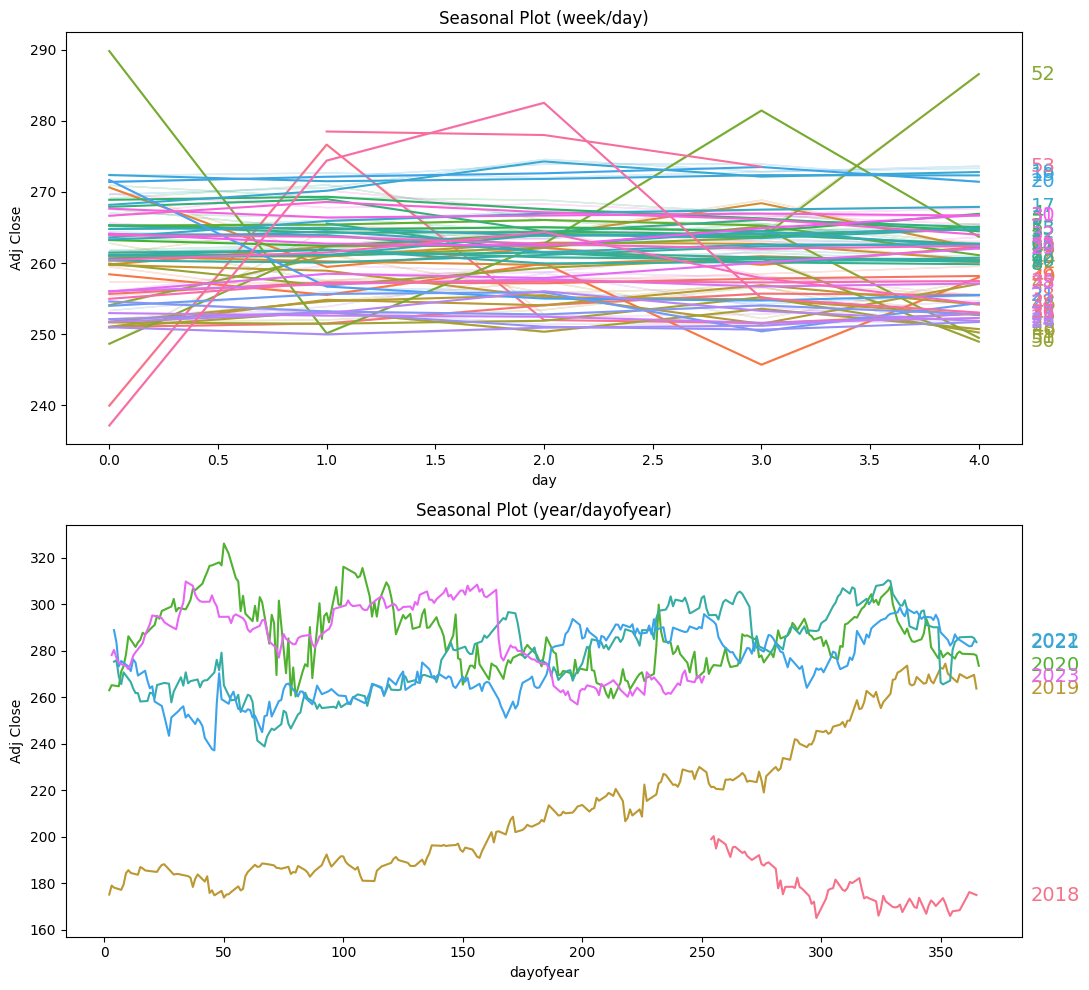

<ipython-input-51-04499b1eb27d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day"] = df.Date.dt.dayofweek  # the x-axis (freq)
<ipython-input-51-04499b1eb27d>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = df.Date.dt.week  # the seasonal period (period)
<ipython-input-51-04499b1eb27d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["week"] = df.Date.dt.week  # the seasonal period (period)
<ipython-in

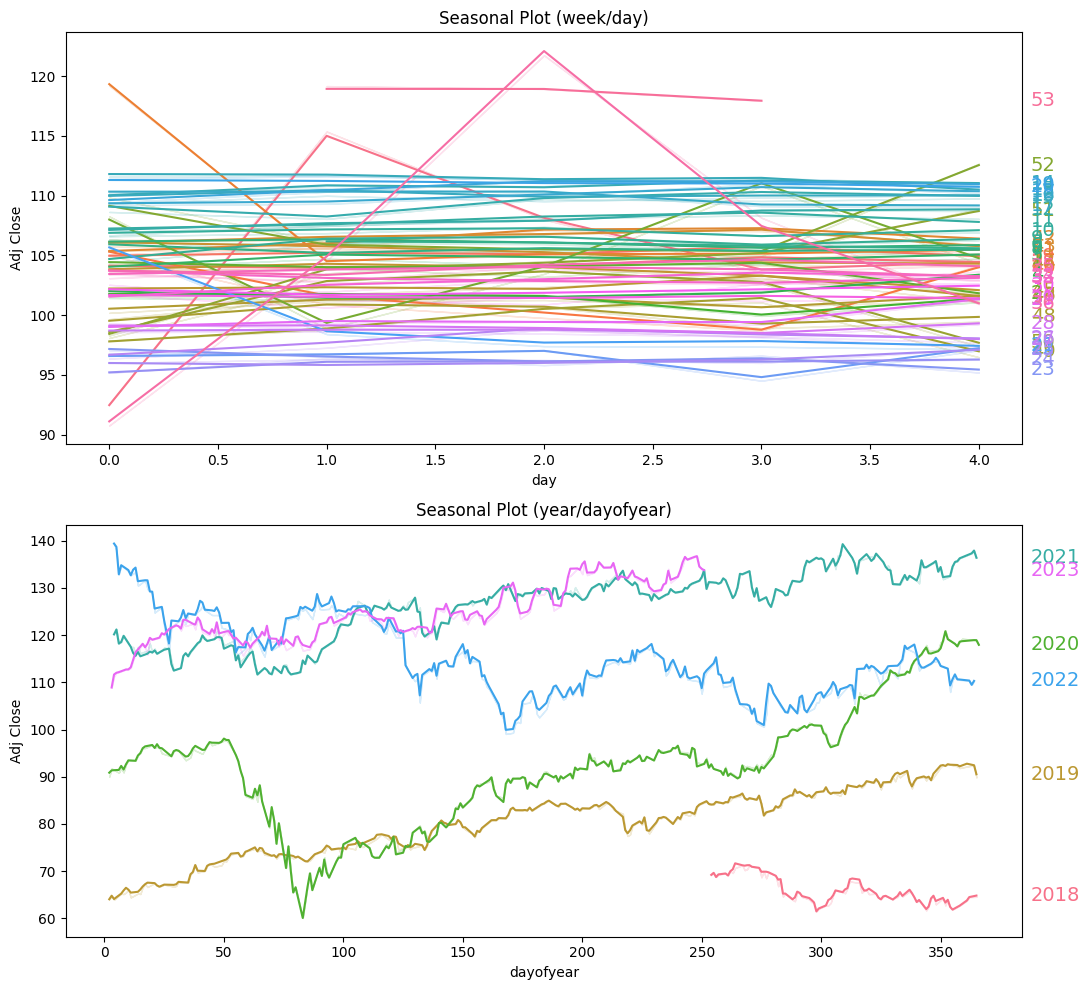

<ipython-input-51-04499b1eb27d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day"] = df.Date.dt.dayofweek  # the x-axis (freq)
<ipython-input-51-04499b1eb27d>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = df.Date.dt.week  # the seasonal period (period)
<ipython-input-51-04499b1eb27d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["week"] = df.Date.dt.week  # the seasonal period (period)
<ipython-in

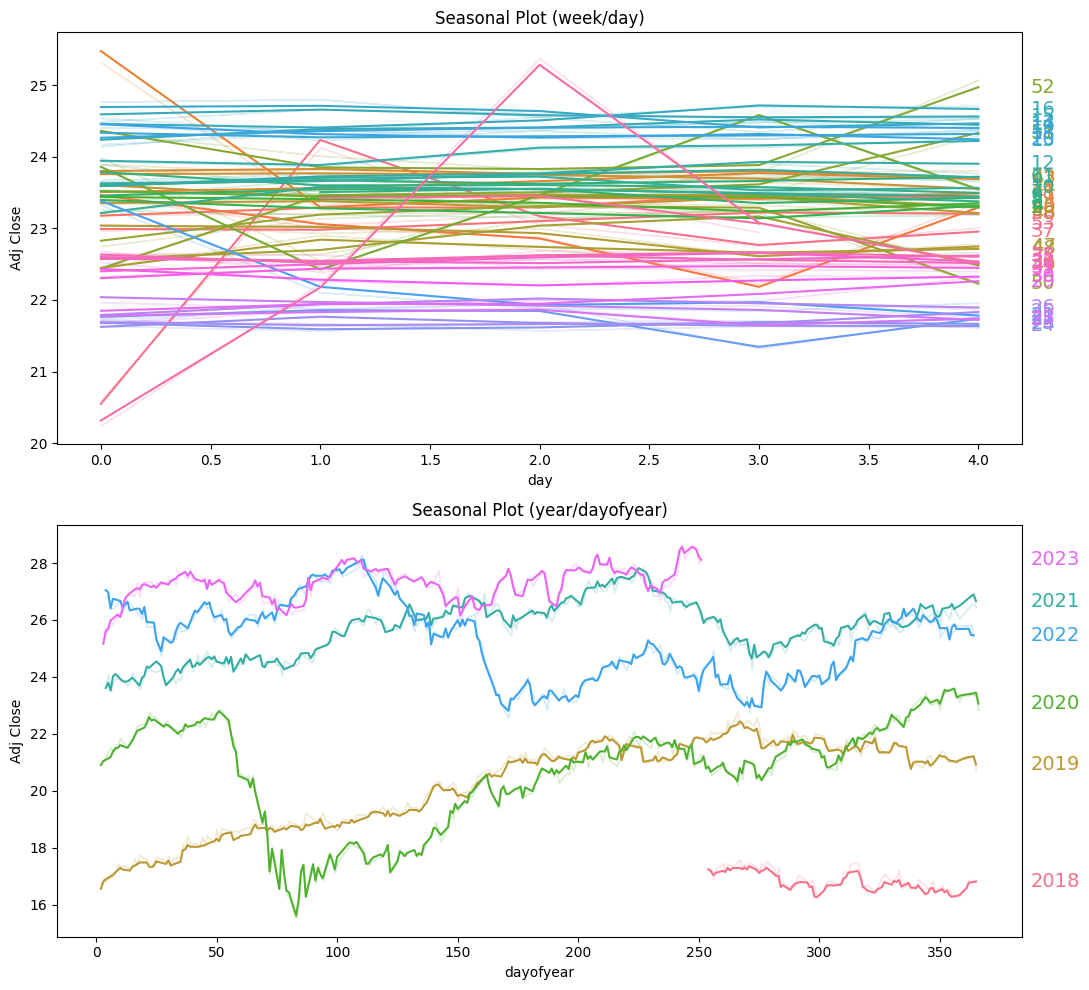

In [51]:
def show_seasonality(df):
  # days within a week
  df["day"] = df.Date.dt.dayofweek  # the x-axis (freq)
  df["week"] = df.Date.dt.week  # the seasonal period (period)

  # days within a year
  df["dayofyear"] = df.Date.dt.dayofyear
  df["year"] = df.Date.dt.year
  fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 10))
  seasonal_plot(df, y="Adj Close", period="week", freq="day", ax=ax0)
  seasonal_plot(df, y="Adj Close", period="year", freq="dayofyear", ax=ax1)
  plt.tight_layout()
  plt.show()

show_seasonality(data1)
show_seasonality(data2)
show_seasonality(data3)


Obviously, our data doesn't have seasonality much.

### Cyclic



In [52]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

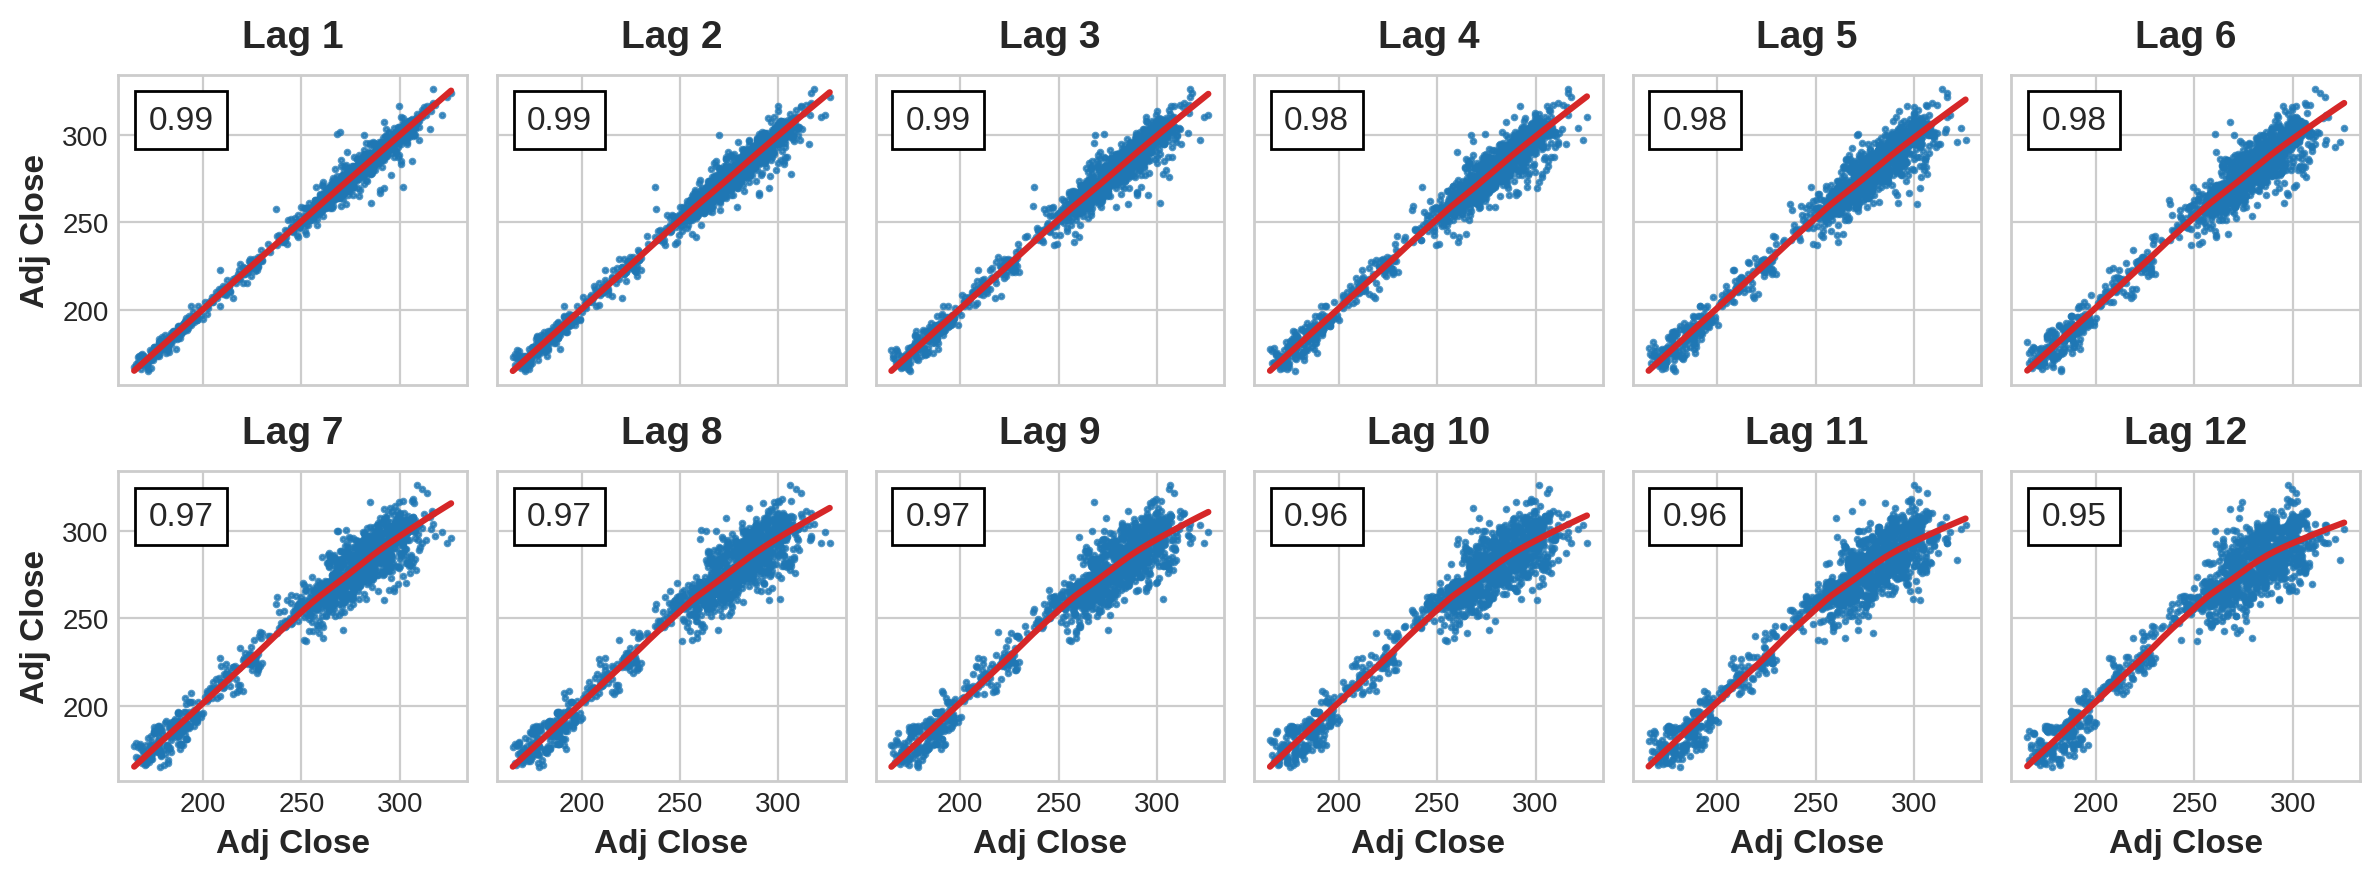

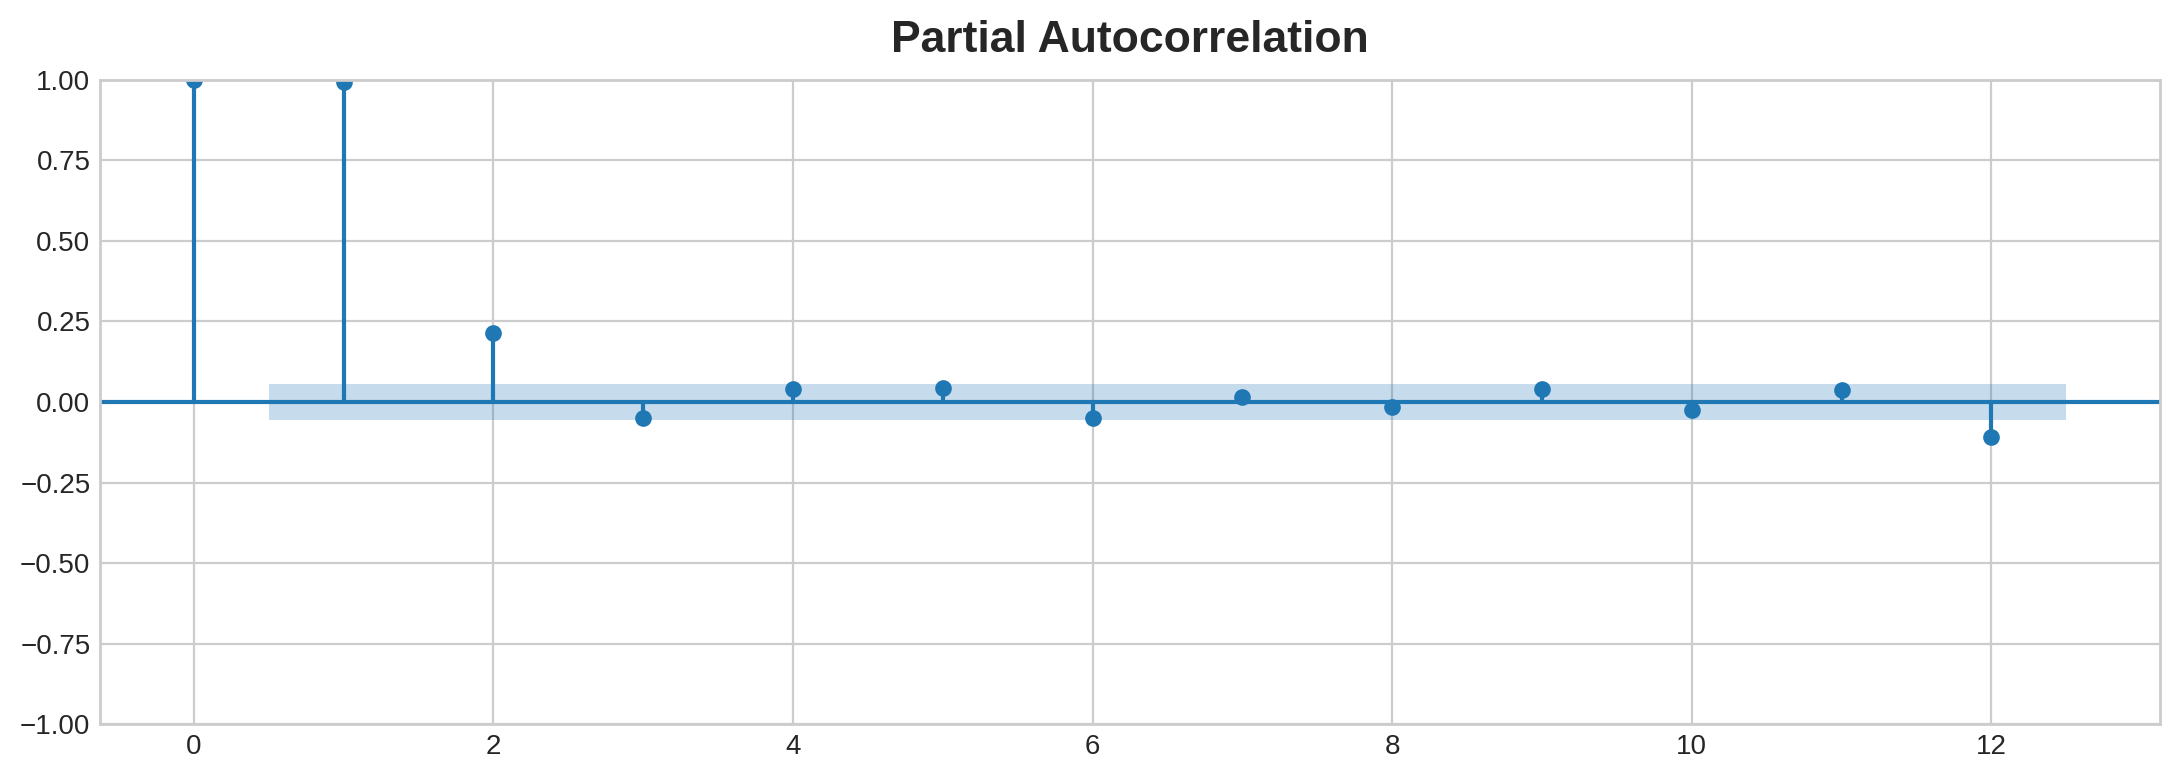

In [53]:
_ = plot_lags(data1['Adj Close'], lags=12, nrows=2)
_ = plot_pacf(data1['Adj Close'], lags=12)

In [54]:
data.head()

Date       Open       High        Low      Close  Adj Close   Volume  \
0 2018-09-11  28.340000  28.670000  28.330000  28.580000  21.998743  3273782   
1 2018-09-12  28.480000  28.590000  28.309999  28.370001  21.837099  2872094   
2 2018-09-13  28.209999  28.290001  28.030001  28.059999  21.598484  3593758   
3 2018-09-14  28.090000  28.280001  28.090000  28.150000  21.667759  3996645   
4 2018-09-17  28.100000  28.430000  28.049999  28.400000  21.860191  3426323   

  Ticker  
0    ANZ  
1    ANZ  
2    ANZ  
3    ANZ  
4    ANZ

## Label Encoder

In [56]:
label_encoder = LabelEncoder()

data['Ticker'] = label_encoder.fit_transform(data['Ticker'])

In [103]:
ticker_data['Id'] = label_encoder.transform(ticker_data['Code'])
ticker_data.to_csv('ticker_data.csv',index=False)

## Machine Learning Model

### Split train and test dataset

In [57]:
data.shape

(20239, 12)

In [58]:
data.head()

Date       Open       High        Low      Close  Adj Close   Volume  \
0 2018-09-11  28.340000  28.670000  28.330000  28.580000  21.998743  3273782   
1 2018-09-12  28.480000  28.590000  28.309999  28.370001  21.837099  2872094   
2 2018-09-13  28.209999  28.290001  28.030001  28.059999  21.598484  3593758   
3 2018-09-14  28.090000  28.280001  28.090000  28.150000  21.667759  3996645   
4 2018-09-17  28.100000  28.430000  28.049999  28.400000  21.860191  3426323   

   Ticker  Day of year  Year      Lag 1      Lag 2  
0       0          254  2018  21.998743  21.998743  
1       0          255  2018  21.998743  21.998743  
2       0          256  2018  21.837099  21.998743  
3       0          257  2018  21.598484  21.837099  
4       0          260  2018  21.667759  21.598484

In [59]:
# Define the date threshold
threshold_date = pd.to_datetime('2022-09-11')

data_train = data[data['Date'] <= threshold_date]
data_test = data[data['Date'] > threshold_date]


In [60]:
def data_of_ticker(data_train, data_test, ticker):
  # Extract data of ticker
  train = data_train[data_train['Ticker'] == ticker]
  test = data_test[data_test['Ticker'] == ticker]

  X_train = train[['Ticker', 'Day of year', 'Year']]
  X_test = test[['Ticker', 'Day of year', 'Year']]
  y_train = train['Adj Close']
  y_test = test['Adj Close']

  print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

  return X_train, y_train, X_test, y_test

In [61]:
def show_result(models, data_train, data_test, ticker, train_mode=True):
  X_train, y_train, X_test, y_test = data_of_ticker(data_train, data_test, ticker)
  predictions = []
  for i, model in enumerate(models):
    if train_mode:
      model.fit(X_train, y_train)
    pred = model.predict(X_test)
    predictions.append(pred)
    print(f'Root Mean Squared Error of Model {i}: {mean_squared_error(pred, y_test, squared=False)}')

  # Visualize
  x = range(len(y_test))
  fig = plt.figure(figsize=(10,6))
  ax = fig.add_subplot(111)
  plt.plot(x, y_test, label='Actual Price')
  # plt.plot(x, prediction, '#0000FF', label='Predicted Price')
  for i, pred in enumerate(predictions):
    label = f'Prediction {i}'
    plt.plot(x, pred, label=label)
  plt.legend()
  plt.show()

  return predictions, y_test

### Hybrid Model
I found a really interesting [lesson](https://www.kaggle.com/code/ryanholbrook/hybrid-models#Introduction) in Kaggle about Hybrid Models for forecasting, so why don't try it first.

Basically, you can understand that Hybrid Model I use in the this notebook like this way: I will use 2 different models, this first one try to learn fit with the original data (X_train, y_train), some models excels at learning path and trend of data, however, sometimes they can not fit well with the flactuating data like stock prices, so I use the other model to learning from the error of the first one to improve the results. Very understandable, right?

In [62]:
class HybridModel:
  def __init__(self, model1, model2):
    self.model1 = model1
    self.model2 = model2

  def fit(self, X_train, y_train):
    # Train model 1
    self.model1.fit(X_train, y_train)
    pred1 = self.model1.predict(X_train)

    # Train model 2 with the labels is substraction of y_train and prediction of model 1
    self.model2.fit(X_train, y_train-pred1)

  def predict(self, X_test):
    pred1 = self.model1.predict(X_test)
    pred2 = self.model2.predict(X_test)
    return pred1+pred2

In [63]:
# Recommended Models
# Model 1 (trend)
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression

# Model 2
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

model1 = HybridModel(
    model1 = LinearRegression(),
    model2 = XGBRegressor(random_state=42)
)
model2 = HybridModel(
    model1 = ElasticNet(random_state=42),
    model2 = RandomForestRegressor(random_state=42)
)
model3 = HybridModel(
    model1 = Ridge(random_state=42),
    model2 = XGBRegressor(random_state=42)
)

model4 = HybridModel(
    model1 = Lasso(random_state=42),
    model2 = MLPRegressor()
)


(1014, 3) (1014,) (251, 3) (251,)
Root Mean Squared Error of Model 0: 2.3597311642950416
Root Mean Squared Error of Model 1: 2.3398706959717614
Root Mean Squared Error of Model 2: 2.3543454616895803
Root Mean Squared Error of Model 3: 1.602933919328995


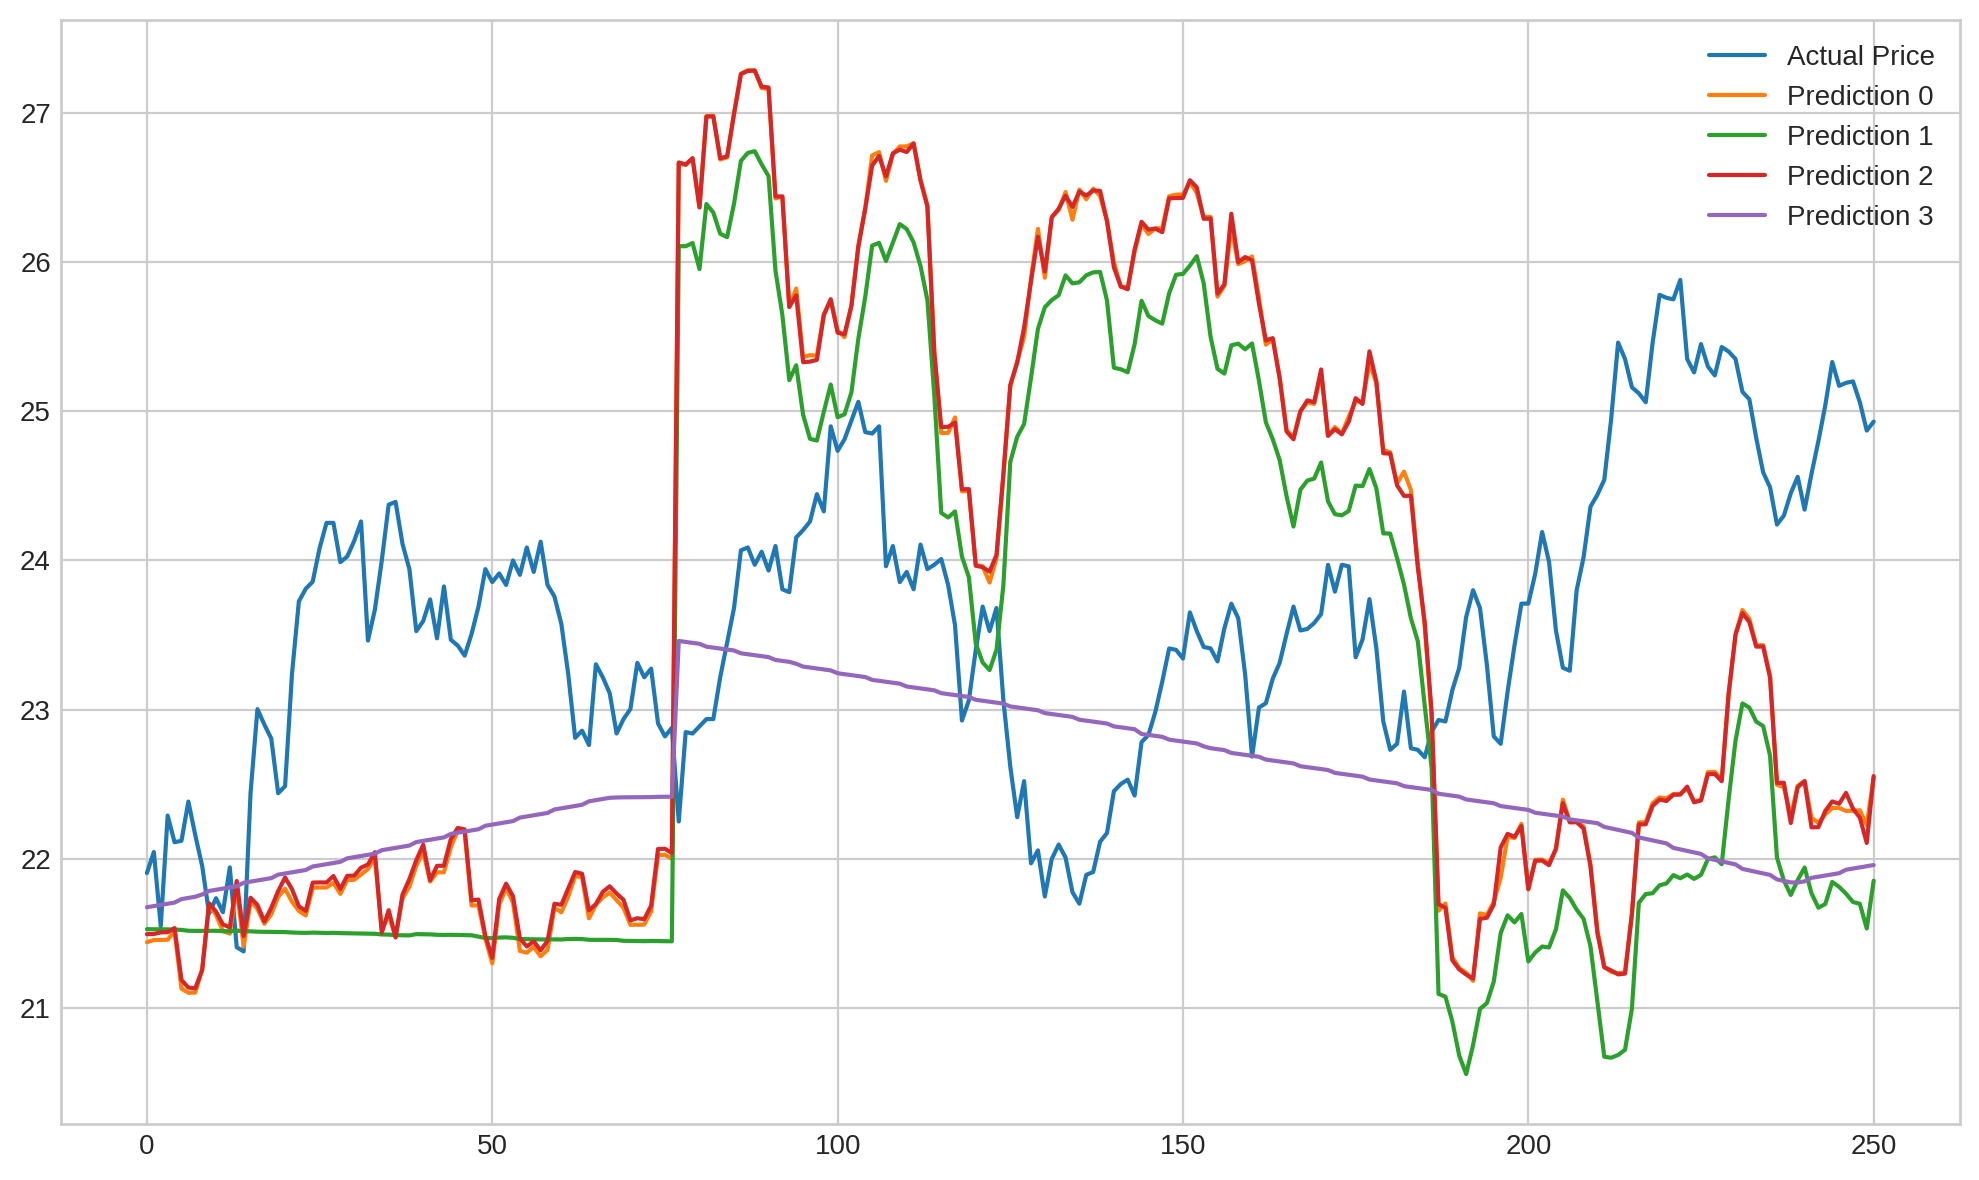

In [64]:
# Get result of each model
pred, act = show_result([model1, model2, model3, model4], data_train, data_test, 0)

Regarding to our knowledge, predicting stock prices is never a easy task, even predicting the trend of them, especially in the period of strong economic fluctuations. Most of Hybrid models predict not so well.

### AMIRA Model
AMIRA (AutoRegressive Integrated Moving Average) is a time series forecasting model used to make predictions based on past data. It models the time series as a combination of autoregressive (AR) and moving average (MA) components, and incorporates differencing to remove non-stationarity. ARIMA is commonly used for univariate time series analysis, where a single variable is observed over time.

The model is specified by three parameters:

- p: order of autoregressive component
- d: order of differencing
- q: order of moving average component

Now, let try!

In [65]:
# Select data of ticker for getting result
X_train2, y_train2, X_test2, y_test2 = data_of_ticker(data_train, data_test, 5)

# split into train and test sets
# predictions = list()
# y_test2 = y_test2.to_list()
# y_train2 = y_train2.to_list()
# history = y_train2

# Implement ARIMA model
arima_model = ARIMA(y_train2, order=(1,2,3))

(1014, 3) (1014,) (251, 3) (251,)


In [66]:
fit_model = arima_model.fit()
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1014
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -223.600
Date:                Wed, 20 Sep 2023   AIC                            457.201
Time:                        09:44:20   BIC                            481.799
Sample:                             0   HQIC                           466.545
                               - 1014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9458      0.569     -1.661      0.097      -2.062       0.170
ma.L1         -0.1503      0.569     -0.264      0.792      -1.265       0.965
ma.L2         -0.9414      0.619     -1.522      0.1

In [67]:
pred = fit_model.forecast(len(y_test2))
pred

1014    18.763855
1015    18.775880
1016    18.779167
1017    18.790719
1018    18.794454
          ...    
1260    20.619664
1261    20.627199
1262    20.634733
1263    20.642268
1264    20.649802
Name: predicted_mean, Length: 251, dtype: float64

In [68]:
mean_squared_error(pred, y_test2, squared=False)

1.3909723791145707

In [69]:
mean_absolute_percentage_error(pred, y_test2)

0.053957712537058174

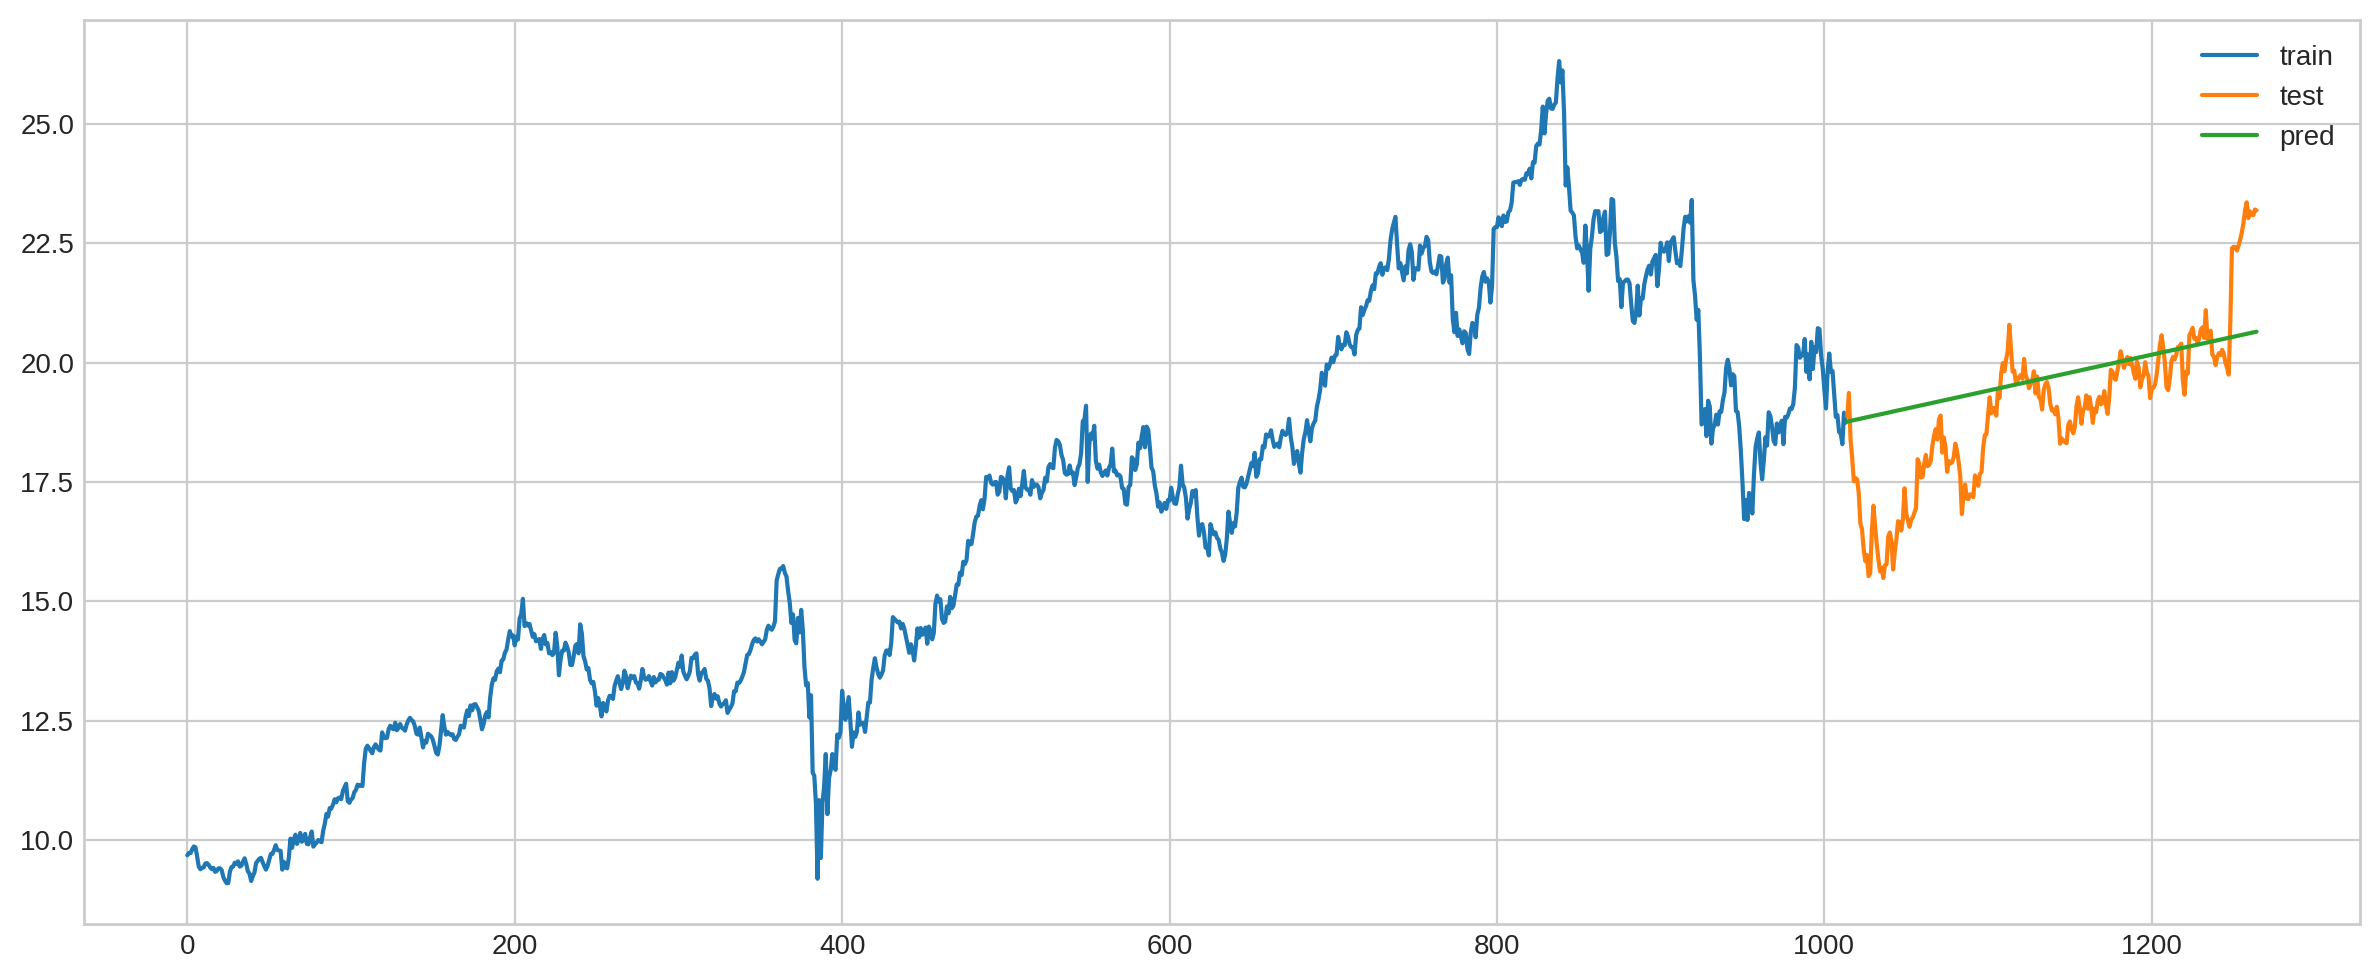

In [70]:
plt.figure(figsize=(12, 5))
plt.plot(y_train2, label='train')
plt.plot(y_test2, label='test')
plt.plot(pred, label='pred')
plt.legend()
plt.show()


Regarding to the graph above, AMIRA model can predict the trend of stock price pretty well.

#### Perform Grid Search for fine-tune parameter

In [71]:
rang = range(4)
l = []
for p in rang:
  for d in rang:
    for q in rang:
      l.append((p, d, q))

In [72]:
# # @title Default title text
# # Select data of ticker for getting result
# X_train2, y_train2, X_test2, y_test2 = data_of_ticker(data_train, data_test, 5)
# results = []

# # Select the best params
# for params in l:
#   arima_model = ARIMA(y_train2, order=params)
#   fit_model = arima_model.fit()
#   pred = fit_model.forecast(len(y_test2))
#   err = mean_squared_error(pred, y_test2, squared=False)
#   results.append(err)
#   print(f'params {params} has RMSE {err}')


# results = pd.DataFrame(results)

It's supposed that there are not big difference when we change the params of ARIMA model, from this grid search the best params is (1,2,3). So we will use it for further.

### Prophet Model
Prophet is a time series forecasting model developed by Facebook’s Core Data Science team. It is a statistical model that uses an additive approach to capture various components of a time series, including trends, seasonality, holidays, and other effects. Prophet also employs Bayesian modeling techniques to estimate model parameters and uncertainty, which helps to provide more accurate predictions and forecast intervals.

In [73]:
# Prepare data for Prophet Model
ticker = 5 # data of ticker for train
data_prophet = data[data['Ticker'] == ticker][['Date', 'Adj Close']]
data_prophet.columns = ('ds', 'y')

# Split train and test
threshold_date = pd.to_datetime('2022-09-12')
data_train_pp, data_test_pp = data_prophet[data_prophet['ds'] < threshold_date], data_prophet[data_prophet['ds'] >= threshold_date]

In [74]:
print(data_train_pp.shape, data_test_pp.shape)

(1014, 2) (251, 2)


In [75]:
# Train Prophet Model
pp_model = Prophet()
pp_model.fit(data_train_pp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjvfgs4t/o93nwpd9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjvfgs4t/wzug1n7m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22630', 'data', 'file=/tmp/tmpsjvfgs4t/o93nwpd9.json', 'init=/tmp/tmpsjvfgs4t/wzug1n7m.json', 'output', 'file=/tmp/tmpsjvfgs4t/prophet_modelnl6rfyl8/prophet_model-20230920094421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:44:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:44:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [76]:
future = data_test_pp[['ds']]
pred_pp = pp_model.predict(future)
pred_pp.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
246 2023-09-04  11.646359    6.010251   17.382621     5.670057    17.313334   
247 2023-09-05  11.627704    5.698265   17.497676     5.601459    17.311950   
248 2023-09-06  11.609048    5.590229   17.609866     5.590150    17.310565   
249 2023-09-07  11.590393    5.519822   17.559107     5.571805    17.327163   
250 2023-09-08  11.571738    5.405132   17.490920     5.508340    17.377481   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
246        0.173837              0.173837              0.173837 -0.102451   
247        0.161084              0.161084              0.161084 -0.078623   
248        0.150529              0.150529              0.150529 -0.054664   
249        0.126202              0.126202              0.126202 -0.046527   
250        0.105730              0.105730              0.105730 -0.036507   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
246     -0.102451     -0.102451  0.276288      0.276288      0.276288   
247     -0.078623     -0.078623  0.239707      0.239707      0.239707   
248     -0.054664     -0.054664  0.205193      0.205193      0.205193   
249     -0.046527     -0.046527  0.172729      0.172729      0.172729   
250     -0.036507     -0.036507  0.142237      0.142237      0.142237   

     multiplicative_terms  multiplicative_terms_lower  \
246                   0.0                         0.0   
247                   0.0                         0.0   
248                   0.0                         0.0   
249                   0.0                         0.0   
250                   0.0                         0.0   

     multiplicative_terms_upper       yhat  
246                         0.0  11.820196  
247                         0.0  11.788788  
248                         0.0  11.759577  
249                         0.0  11.716594  
250                         0.0  11.677468

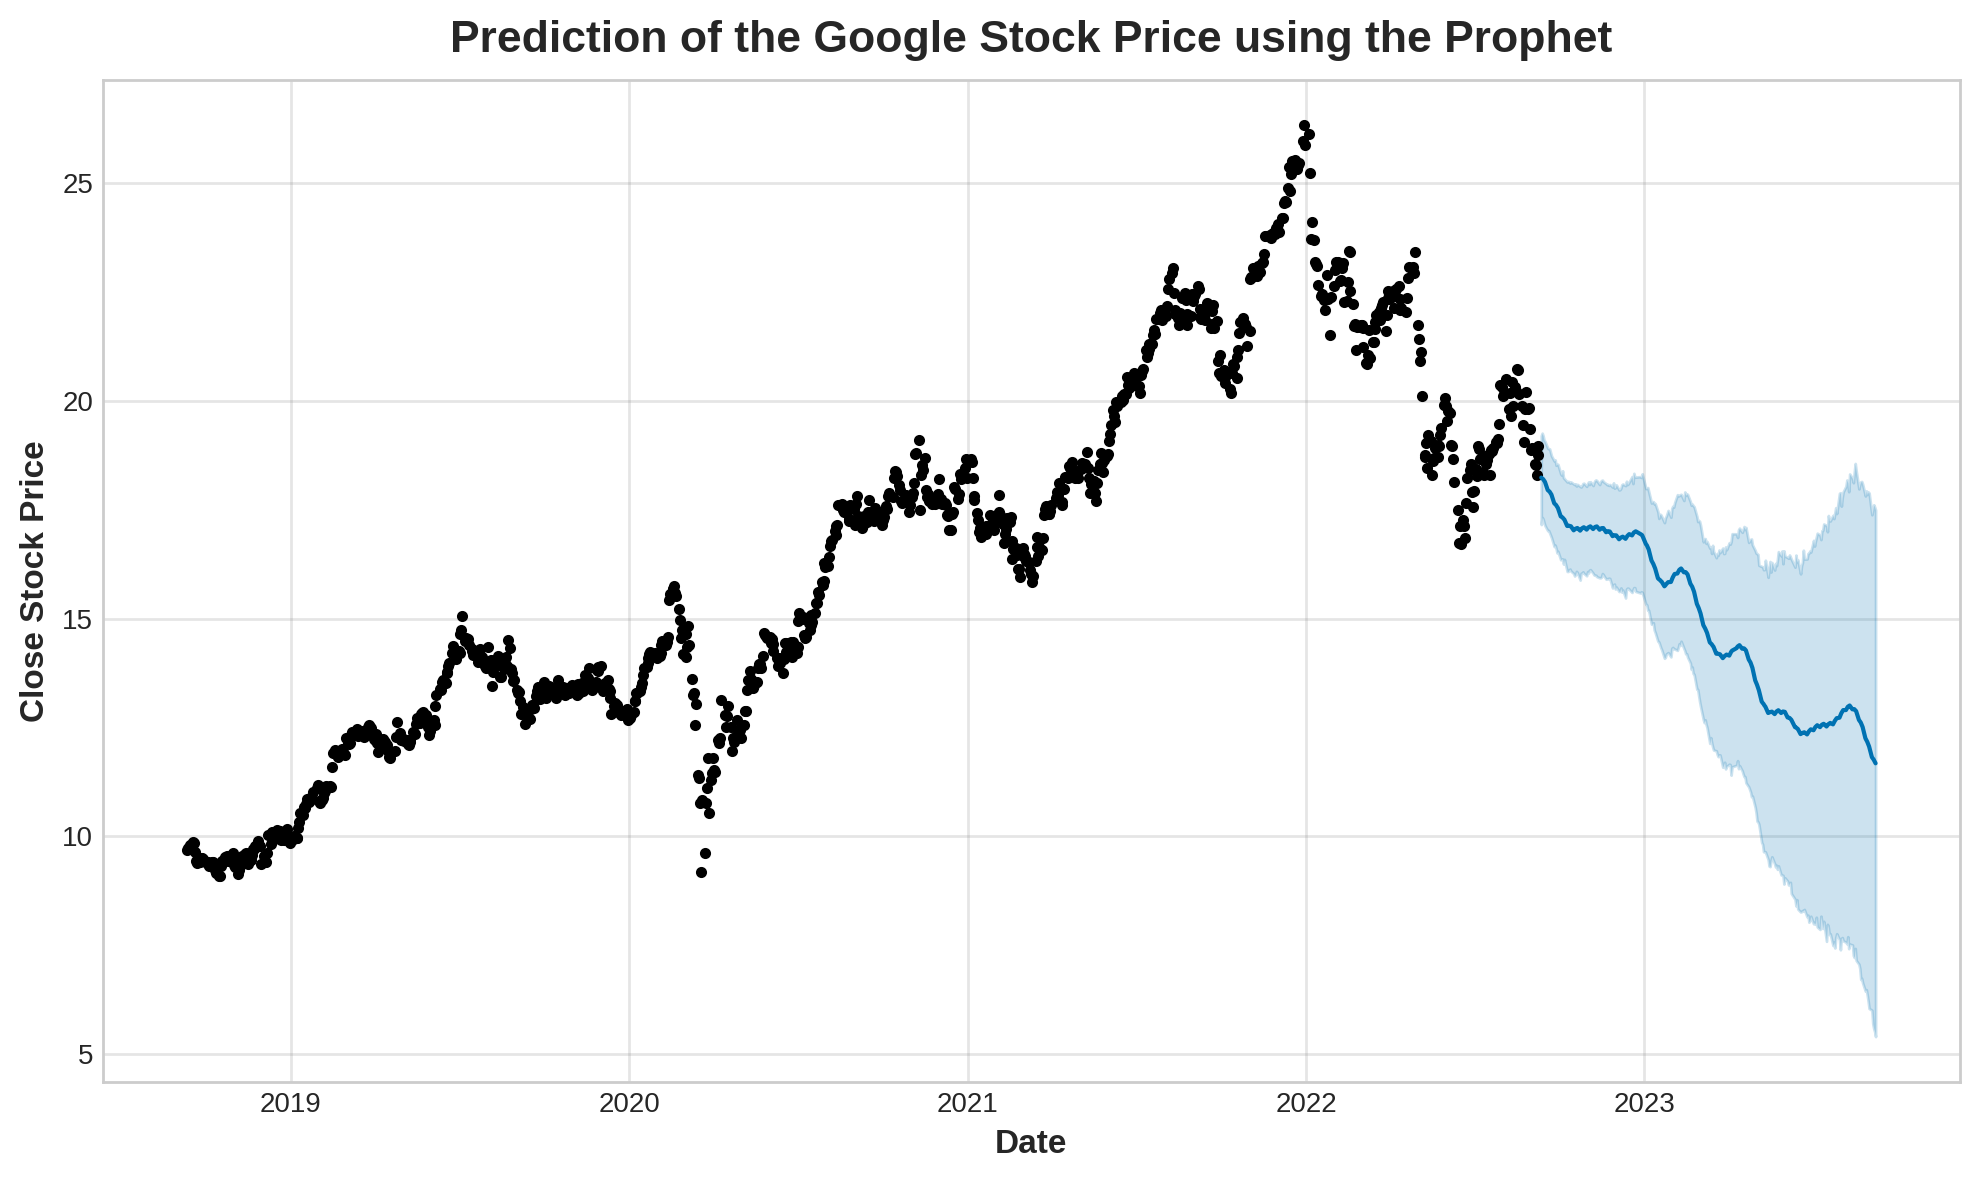

In [77]:
pp_model.plot(pred_pp)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

The trend is up, however Prophet Model predicts it would go down.

In [78]:
baseline_model_cv = cross_validation(model=pp_model, initial='1014 days', period='30 days', horizon = '251 days', parallel="processes")
baseline_model_cv.head()

INFO:prophet:Making 7 forecasts with cutoffs between 2021-07-05 00:00:00 and 2022-01-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x78bce4a56e60>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjvfgs4t/6f4aefkw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjvfgs4t/e1z9b_3w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjvfgs4t/3prq1aqy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjvfgs4t/_n9s1tt7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41083', 'data', 'file=/tmp/tmpsjvfgs4t/e1z9b_3w.json', 'init=/tmp/tmpsjvfgs4t/3prq1aqy.json', 'output', 'file=/tmp/tmpsjvfgs4t/prophet_modelm4andxgx/prophet_model-20230920094422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:idx 0
09:44:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1

ds       yhat  yhat_lower  yhat_upper          y     cutoff
0 2021-07-06  20.605686   19.909441   21.249580  20.172625 2021-07-05
1 2021-07-07  20.619538   19.943383   21.320233  20.580347 2021-07-05
2 2021-07-08  20.623162   19.923015   21.268564  20.687132 2021-07-05
3 2021-07-09  20.633028   19.983995   21.304405  20.716255 2021-07-05
4 2021-07-12  20.612079   19.966365   21.262660  21.162809 2021-07-05

In [79]:
baseline_model_p = performance_metrics(baseline_model_cv, rolling_window=1)
baseline_model_p.head()

horizon        mse      rmse       mae      mape     mdape     smape  \
0 251 days  21.138323  4.597643  3.178725  0.155929  0.085177  0.135672   

   coverage  
0  0.379851

Mean Absolute Percentage Error(MAPE) sums up the absolute percentage difference between actual and prediction and is divided by the number of predictions. MAPE is independent of the magnitude of data, so it can be used to compare different forecasts. But it’s undefined when the actual value is zero.

MAPE = 15.55%

In [80]:
data_test_pp.reset_index()['y']

0      18.873505
1      19.365517
2      18.391335
3      17.997728
4      17.515556
         ...    
246    23.170000
247    23.100000
248    23.090000
249    23.209999
250    23.190001
Name: y, Length: 251, dtype: float64

RMSE: 5.416226998608284


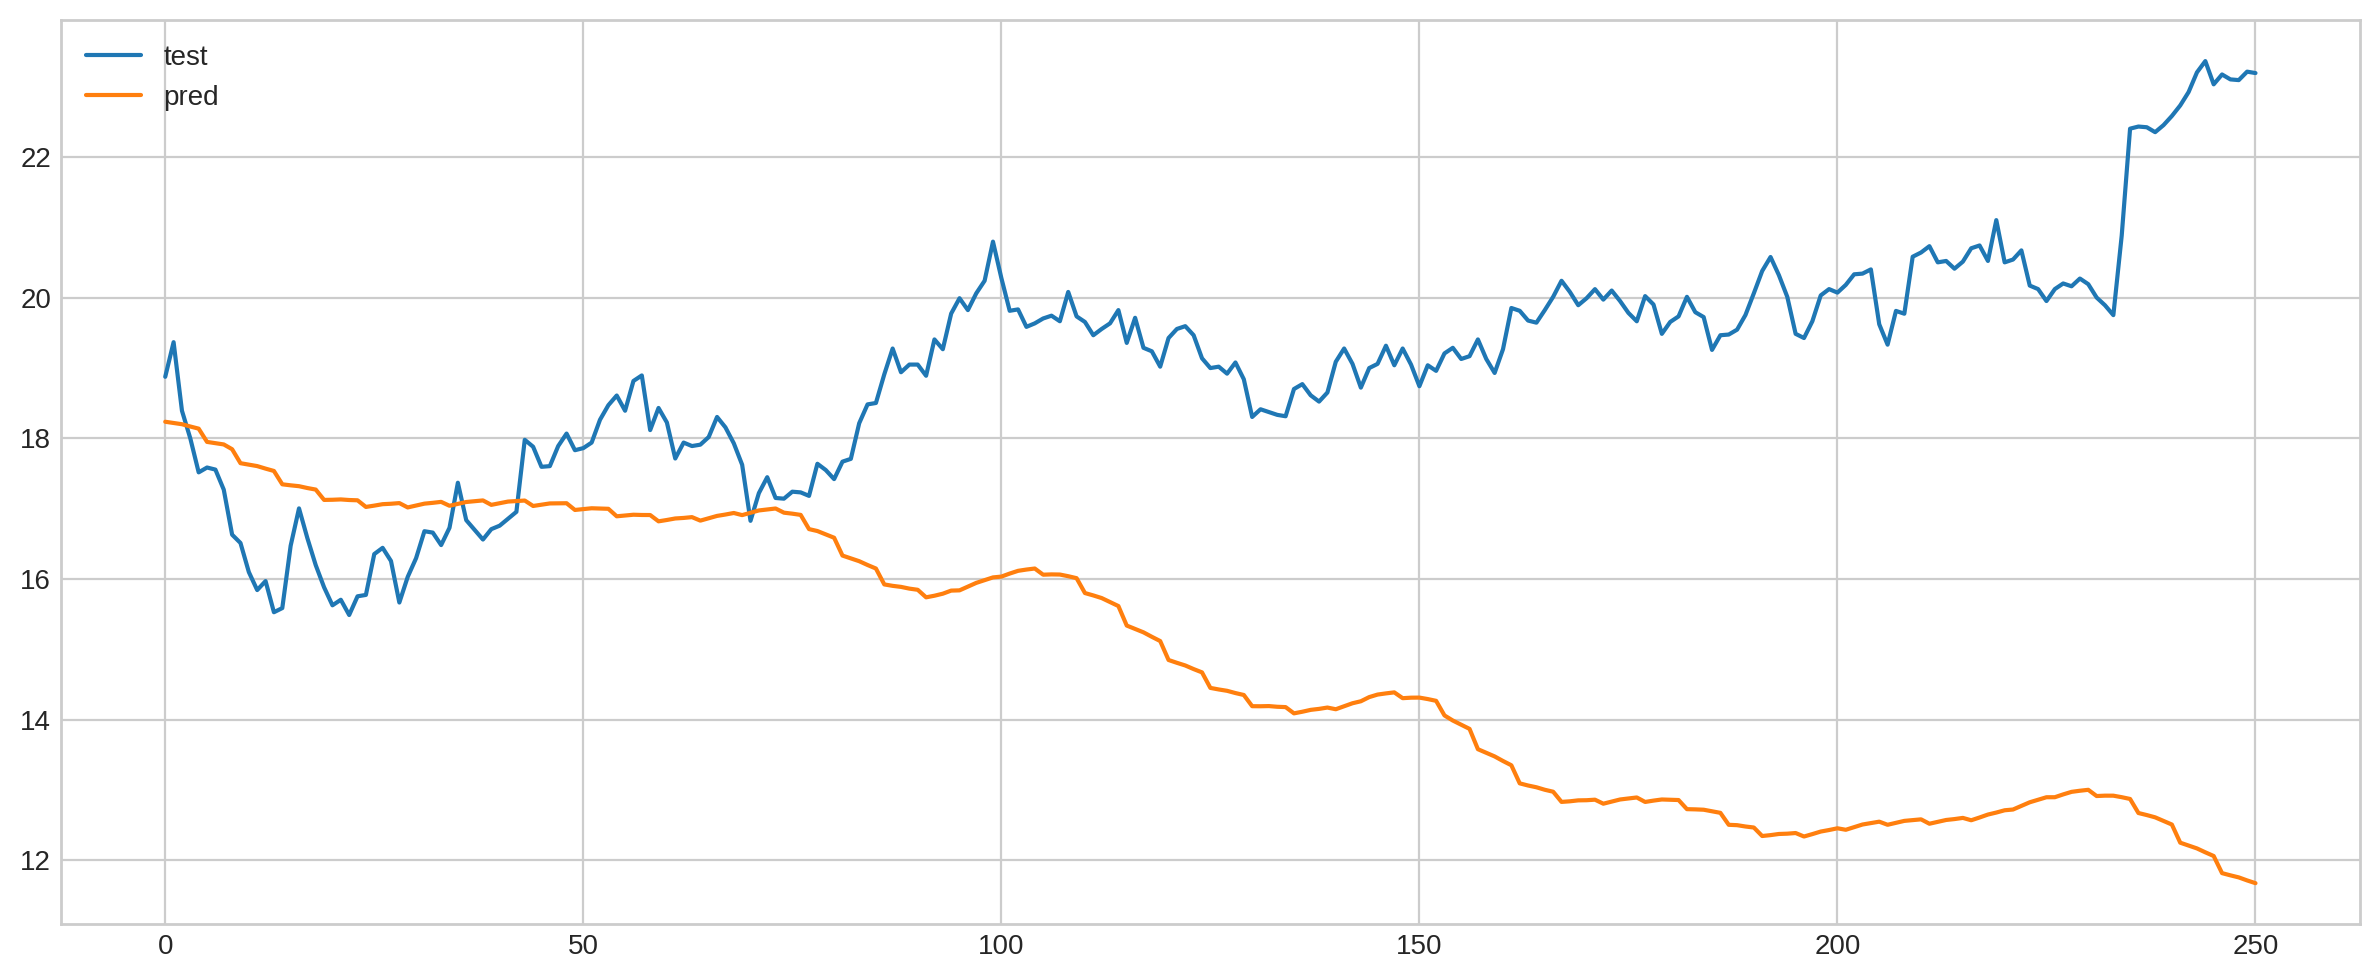

In [81]:
error = mean_squared_error(pred_pp['yhat'], data_test_pp['y'], squared=False)
print(f'RMSE: {error}')
plt.figure(figsize=(12, 5))
# plt.plot(data_train_pp['y'], label='train')
plt.plot(data_test_pp.reset_index()['y'], label='test')
plt.plot(pred_pp['yhat'], label='pred')
plt.legend()
plt.show()

As we can see, Prophet model performs not so well. So, I will try some fine-tuning methods. I find an helpful [article](https://medium.com/grabngoinfo/hyperparameter-tuning-and-regularization-for-time-series-model-using-prophet-in-python-9791370a07dc) in Medium to guide us.

#### Manual Hyperparameter Changes

In [82]:
# Initiate the model
manual_model = Prophet(changepoint_range=0.8)
# Fit the model on the training dataset
manual_model.fit(data_train_pp)
# Cross validation
manual_model_cv = cross_validation(model=manual_model, initial='1014 days', period='30 days', horizon = '251 days', parallel="processes")
# Model performance metrics
manual_model_p = performance_metrics(manual_model_cv, rolling_window=1)
manual_model_p['mape'].values[0]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjvfgs4t/_rpuxc3q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjvfgs4t/t118jbb8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24483', 'data', 'file=/tmp/tmpsjvfgs4t/_rpuxc3q.json', 'init=/tmp/tmpsjvfgs4t/t118jbb8.json', 'output', 'file=/tmp/tmpsjvfgs4t/prophet_modelyimk1h40/prophet_model-20230920094426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:44:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:44:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 7 forecasts with cutoffs between 2021-07-05 00:00:00 and 2022-01-01 00:00:00
INFO:prophet:Applying in parallel with <concu

0.15592871774410827

The MAPE value increases to 15.55% which is equal to 15.55%. So we shouldn't change the changepoint_range.

#### Automatic Hyperparameter Tuning

Please modify the range of each parameter for your special task. In my case, after some experiments I choose this grid. And uncomment the code below to perform grid search again.

In [ ]:
# Uncomment to get best params
# Set up parameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.003, 0.005, 0.007],
    'seasonality_prior_scale': [0.001, 0.003, 0.005],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = []
rmses = []

'''
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params).fit(data_train_pp)
    # Cross-validation
    df_cv = cross_validation(model=m, initial='1014 days', period='30 days', horizon = '251 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mape'].values[0])
    rmses.append(df_p['rmse'].values[0])

# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
tuning_results['rmse'] = rmses

# Find the best parameters
best_params = all_params[np.argmin(mapes)]
best_params_rmse = all_params[np.argmin(rmses)]
print(f'mape: {best_params} \n rmse: {best_params_rmse}')

# Fit the model using the best parameters
auto_model = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'],
                     seasonality_prior_scale=best_params['seasonality_prior_scale'],
                     seasonality_mode=best_params['seasonality_mode'])
# Fit the model on the training dataset
auto_model.fit(data_train_pp)
# Cross validation
auto_model_cv = cross_validation(model=auto_model, initial='1014 days', period='30 days', horizon = '251 days', parallel="processes")
# Model performance metrics
auto_model_p = performance_metrics(auto_model_cv, rolling_window=1)
auto_model_p['mape'].values[0]
'''

Best params for each metrics:

`mape: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.003, 'seasonality_mode': 'multiplicative'}`

`rmse: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.003, 'seasonality_mode': 'multiplicative'}`

#### Test the fine-tuned model

In [84]:
data_train_pp

ds          y
0    2018-09-11   9.679289
1    2018-09-12   9.725033
2    2018-09-13   9.725033
3    2018-09-14   9.807369
4    2018-09-17   9.862261
...         ...        ...
1009 2022-09-05  18.548779
1010 2022-09-06  18.519258
1011 2022-09-07  18.292934
1012 2022-09-08  18.952227
1013 2022-09-09  18.745583

[1014 rows x 2 columns]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjvfgs4t/2jv3n5dp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjvfgs4t/rniexxxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35734', 'data', 'file=/tmp/tmpsjvfgs4t/2jv3n5dp.json', 'init=/tmp/tmpsjvfgs4t/rniexxxp.json', 'output', 'file=/tmp/tmpsjvfgs4t/prophet_modelmw73uze4/prophet_model-20230920094521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:45:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:45:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


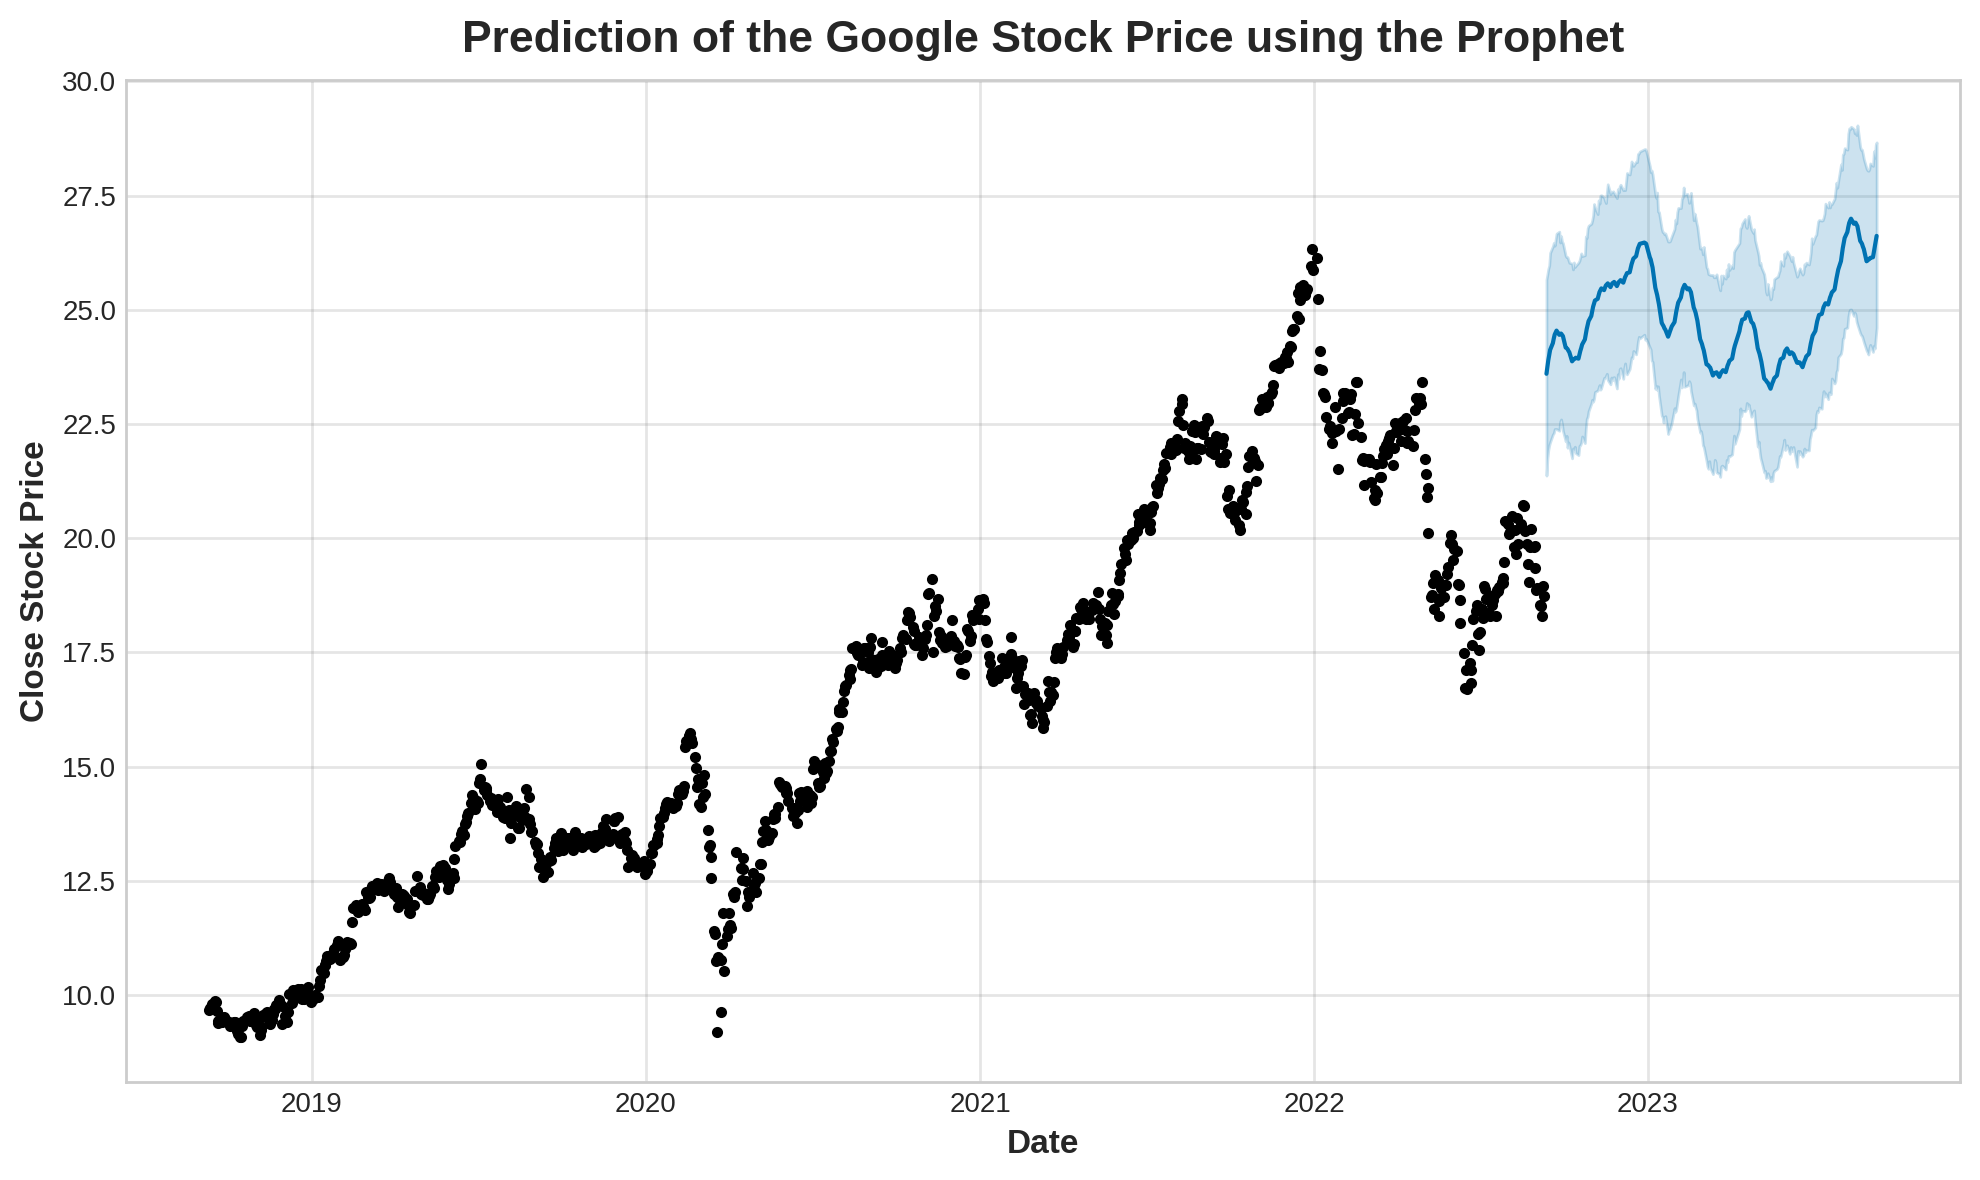

In [85]:
pp_model_tuned =Prophet(changepoint_prior_scale=0.001,
                     seasonality_prior_scale=0.03,
                     changepoint_range=1,
                     seasonality_mode='multiplicative')
pp_model_tuned.fit(data_train_pp)
future = data_test_pp[['ds']]
pred_pp = pp_model_tuned.predict(future)
pred_pp.tail()

pp_model_tuned.plot(pred_pp)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

RMSE: 6.081534423274183


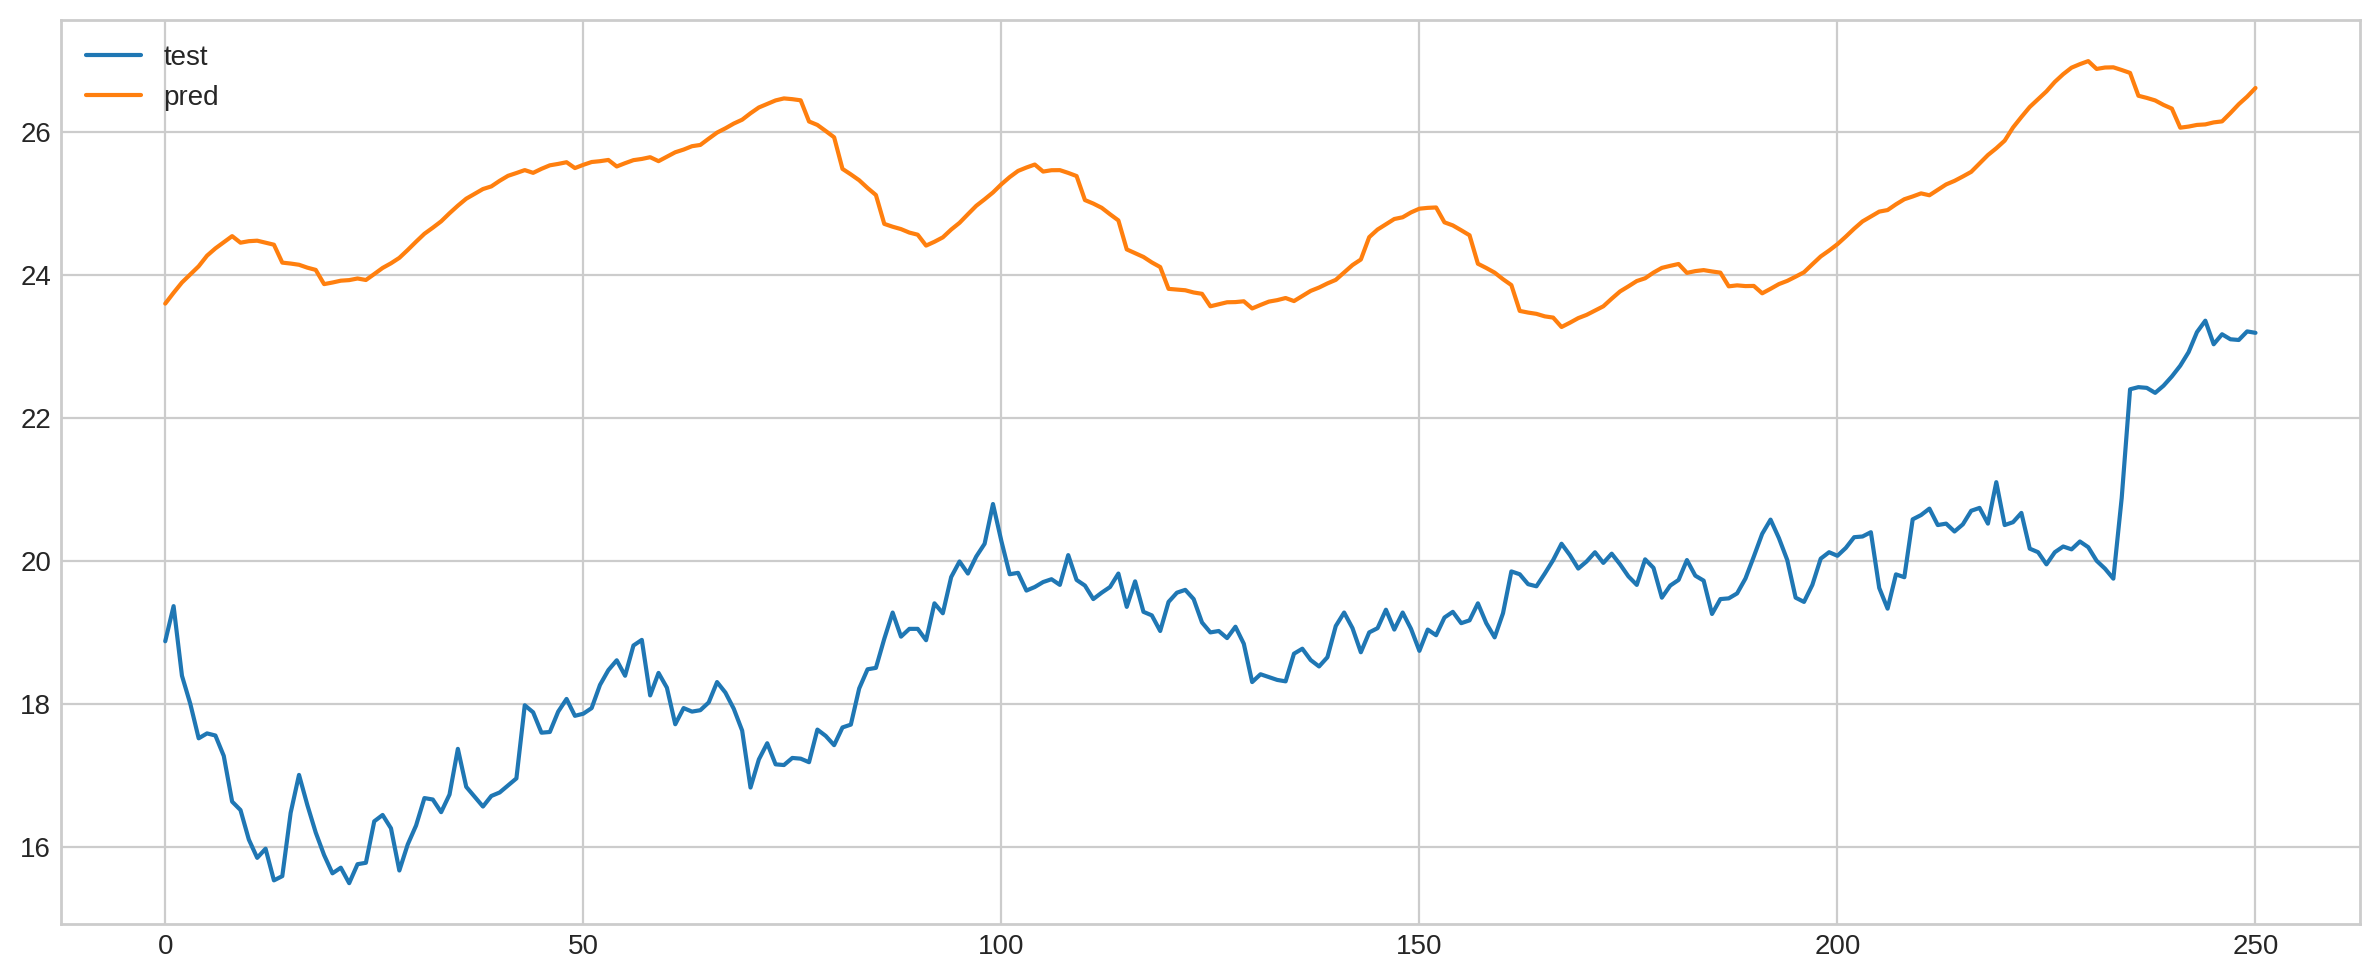

In [86]:
error = mean_squared_error(pred_pp['yhat'], data_test_pp['y'], squared=False)
print(f'RMSE: {error}')
plt.figure(figsize=(12, 5))
# plt.plot(data_train_pp['y'], label='train')
plt.plot(data_test_pp.reset_index()['y'], label='test')
plt.plot(pred_pp['yhat'], label='pred')
plt.legend()
plt.show()

In [87]:
from prophet.plot import plot_plotly

future = pp_model_tuned.make_future_dataframe(periods=365)
forecast = pp_model_tuned.predict(future)

plot_plotly(pp_model_tuned, forecast)

### Final Model

Although the ARIMA model have better performance than Prophet, I decided to go with Prophet for some reasons:
- Easy to implement.
- Have many tool for visualize and diagnosis.
